In [2]:
import os
os.chdir("full file path")

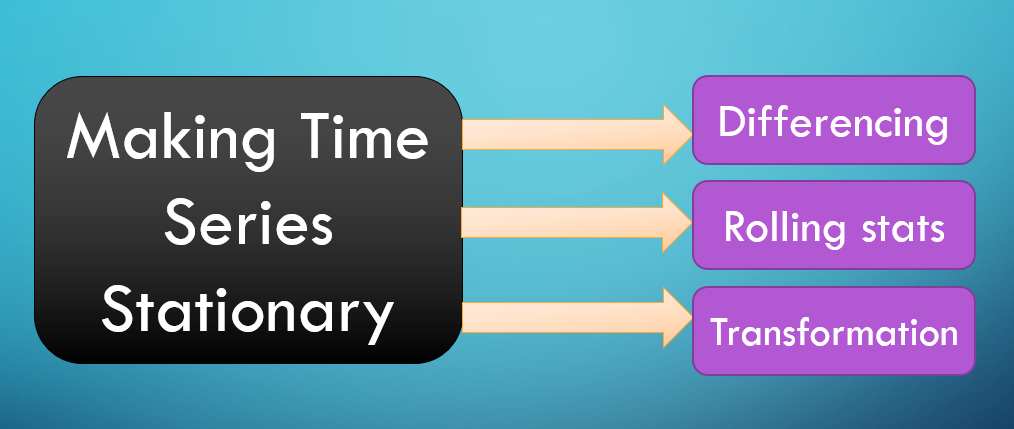

In [2]:
# do not run this cell
from IPython.display import Image
Image(filename='st.png') 

In [3]:
#loading important libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#reading the time series data
trainingdata = pd.read_csv('AirPassengers.csv')



In [4]:
trainingdata.head(10)

,Travel date,Passengers
0,1/1/1949,112
1,2/1/1949,118
2,3/1/1949,132
3,4/1/1949,129
4,5/1/1949,121
5,6/1/1949,135
6,7/1/1949,148
7,8/1/1949,148
8,9/1/1949,136
9,10/1/1949,119


<AxesSubplot:>

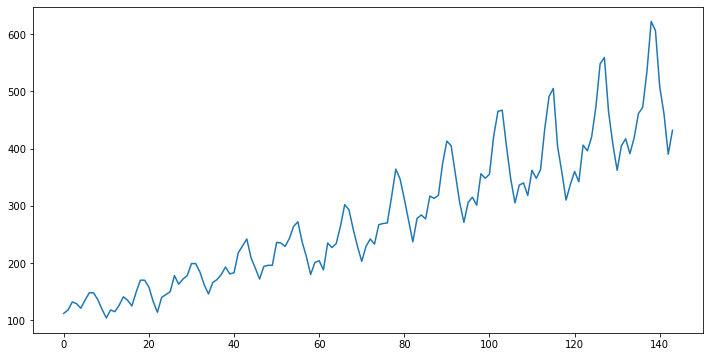

In [5]:
plt.rcParams.update({'figure.figsize': (12,6)})
trainingdata['Passengers'].plot()

# Method 1- Differencing and Seasonal differencing

In [6]:
#Differencing meaning y(t) = y(t)-y(t-1)

In [11]:
# adding new column names 'Passengers_diff'
trainingdata['Passengers_diff'] = trainingdata['Passengers'] - trainingdata['Passengers'].shift(1)
# df.shift(1) -- will push the data by 1 row, so the y(t) formula will get satisfied

In [14]:
trainingdata.Passengers_diff.head(10) # because of series.shift(1), the first value is NaN

0     NaN
1     6.0
2    14.0
3    -3.0
4    -8.0
5    14.0
6    13.0
7     0.0
8   -12.0
9   -17.0
Name: Passengers_diff, dtype: float64

<AxesSubplot:>

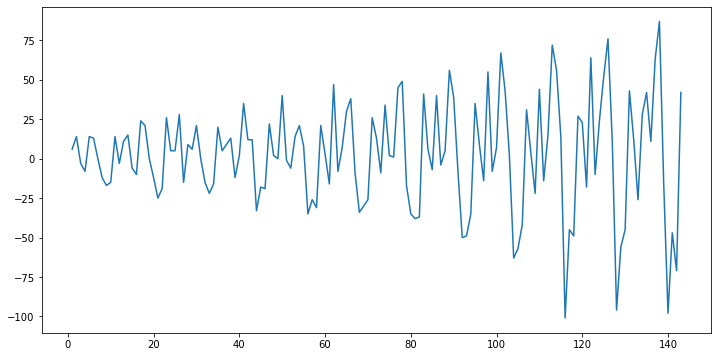

In [16]:
trainingdata['Passengers_diff'].dropna().plot() # have dropped the first na value before plotting (not necessary)

In [9]:
# Sesonal differencing meaning - y(t) = y(t)-y(t-n)

<AxesSubplot:>

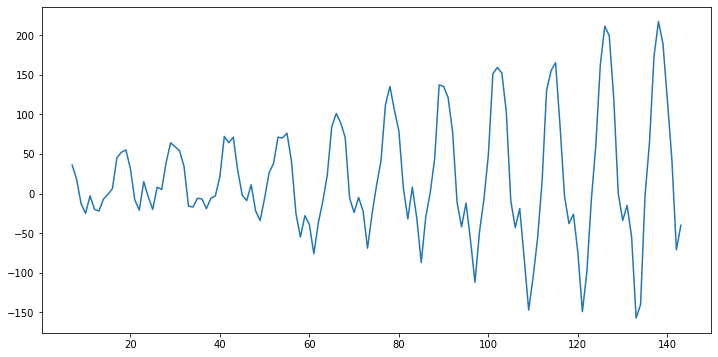

In [18]:
# differentiating with a n=7 value
trainingdata['Passengers_diff_7'] = trainingdata['Passengers'] - trainingdata['Passengers'].shift(7)
trainingdata['Passengers_diff_7'].dropna().plot()

# Method 2 - Transformation

In [19]:
# Create transformation columns
import numpy as np

# Calculate the log : log transformation
trainingdata['adj_log'] = np.log(trainingdata['Passengers'])

# Calculate the square root : square root transformation
trainingdata['adj_sqrt'] = np.sqrt(trainingdata['Passengers'])

# Calculate the cubed root : cube root transformation
trainingdata['adj_cbrt'] = np.cbrt(trainingdata['Passengers'])

In [21]:
 trainingdata.adj_log.isnull().sum() # there is no na values

0

<AxesSubplot:>

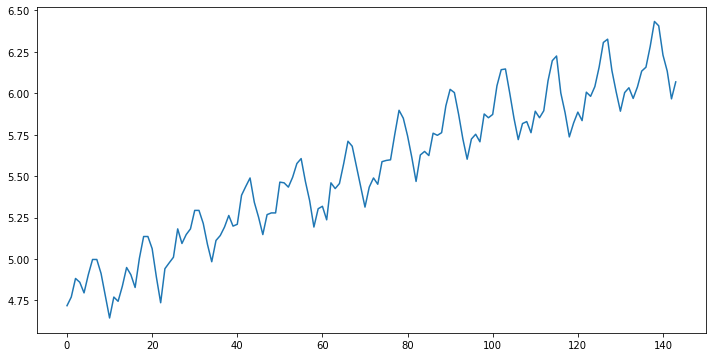

In [23]:
# plotting the time series data after log transformation
trainingdata['adj_log'].dropna().plot()

<AxesSubplot:>

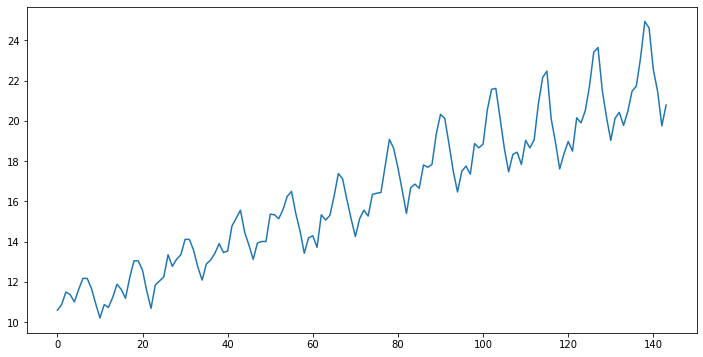

In [24]:
# plotting the data after square-root transformation
trainingdata['adj_sqrt'].dropna().plot()

##### Simply log / square_root / cube_root transformation was not making much difference.
##### Thus let us make some modification and plot the "log - difference" transformation

<AxesSubplot:>

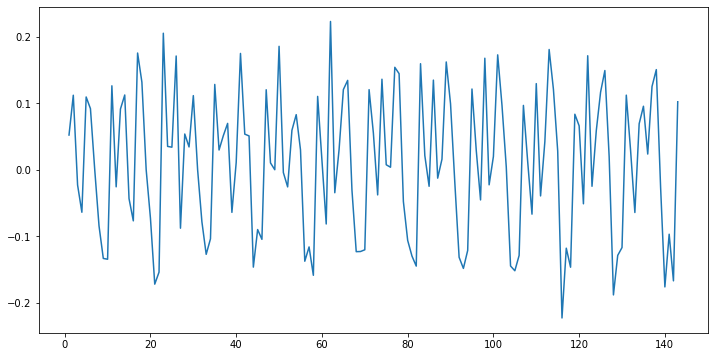

In [25]:
trainingdata['Passengers_log_diff'] = trainingdata['adj_log'] - trainingdata['adj_log'].shift(1)
trainingdata['Passengers_log_diff'].dropna().plot()

<AxesSubplot:>

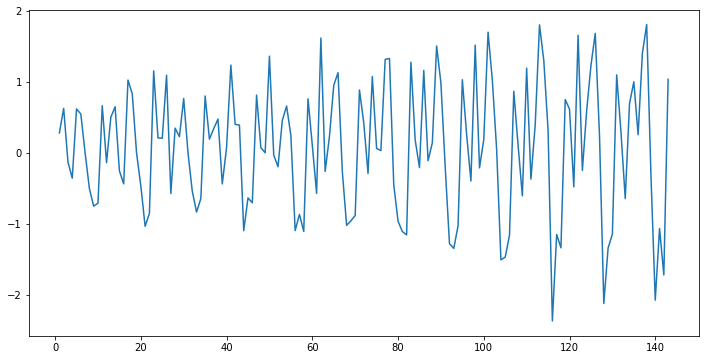

In [26]:
# the graph for square root difference
trainingdata['Passengers_sqrt_diff'] = trainingdata['adj_sqrt'] - trainingdata['adj_sqrt'].shift(1)
trainingdata['Passengers_sqrt_diff'].dropna().plot()

# Method 3- Rolling statistics

In [27]:
trainingdata['MA20'] = trainingdata['Passengers'].rolling(window = 30).mean()

In [32]:
trainingdata.Passengers[:30].mean() # this is the exacty the first value (as window size has been kept as 30) of MA20 (after all NA values)

139.4

In [33]:
trainingdata.MA20.head(30)

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
10      NaN
11      NaN
12      NaN
13      NaN
14      NaN
15      NaN
16      NaN
17      NaN
18      NaN
19      NaN
20      NaN
21      NaN
22      NaN
23      NaN
24      NaN
25      NaN
26      NaN
27      NaN
28      NaN
29    139.4
Name: MA20, dtype: float64

<AxesSubplot:>

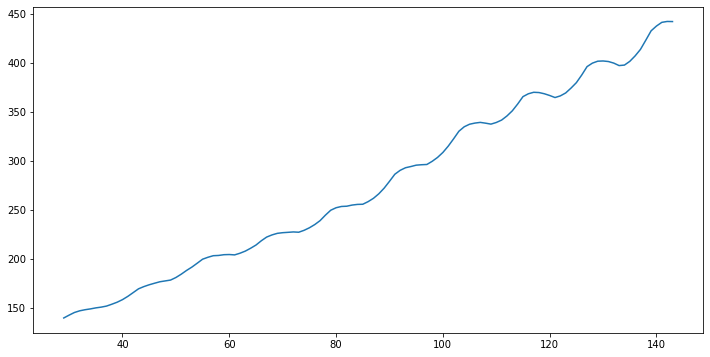

In [34]:
trainingdata['MA20'].dropna().plot()

In [ ]:
# ternd component seems to be there but the seasonality has been smothened.